In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import re
 
sys.path.append('../')

from functions import *

data = pd.read_csv("../../data/simulated.csv")

data = data[["residual", "sellerfeedbackscore", "ispolice"]]

def comma(s):
    add_comma = lambda match: match.group(0).replace(" ", ", ")
    
    s = s.replace("\n", "")

    s = re.sub(r"([0-9\.]+\s)", add_comma, s)
    
    return eval(s)

data.residual = data.residual.apply(comma)

/Users/liumukun/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.titleweight'] = 1000
plt.rcParams['axes.labelpad'] = 5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.facecolor'] = 'white'

In [3]:
data = data.sort_values("ispolice")
data = data.explode("residual")

In [11]:
colors = [(1,129/255,31/255,0.5) if data.iloc[i,2] == 1.0 else (55/255,132/255,179/255,0.5) for i in range(len(data))]

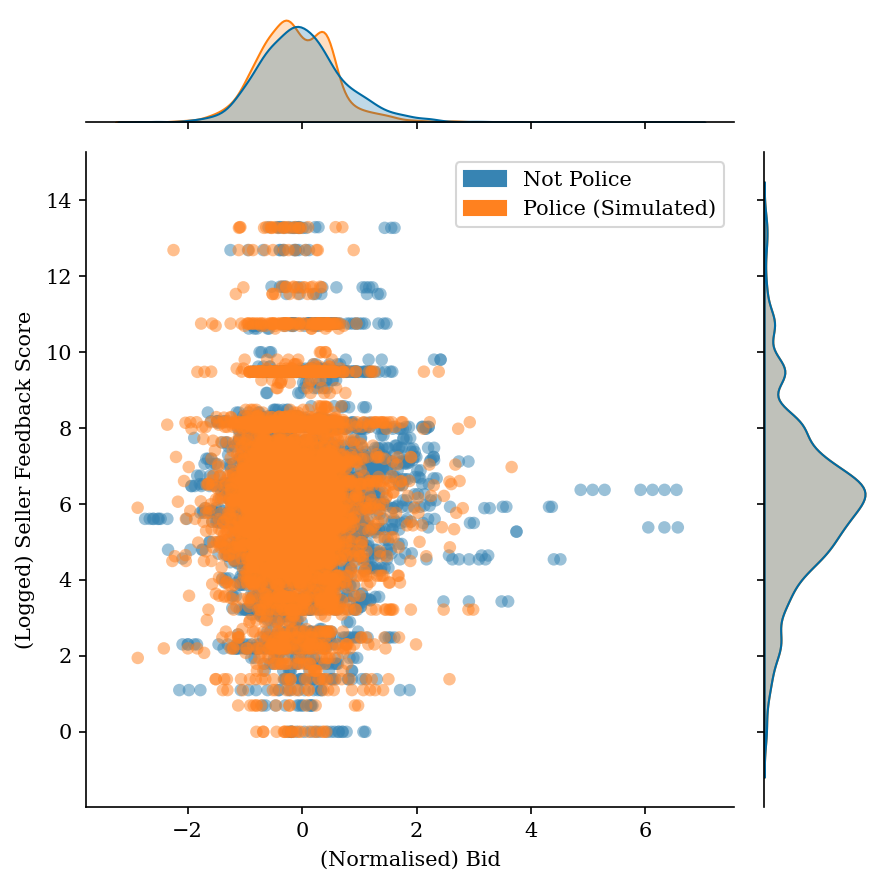

In [22]:
import matplotlib.patches as mpatches

data = data.assign(_ispolice=data.ispolice.map({0: "Not Police", 1: "Police"}))
p = sns.jointplot(data=data, x="residual", y="sellerfeedbackscore", hue="_ispolice")

p.ax_joint.cla()
plt.sca(p.ax_joint)
plt.scatter(data.residual, data.sellerfeedbackscore, c=colors, edgecolors="none")

plt.xlabel("(Normalised) Bid")
plt.ylabel("(Logged) Seller Feedback Score")

police = mpatches.Patch(color=(1,129/255,31/255,1), label="Police (Simulated)")
nonpolice = mpatches.Patch(color=(55/255,132/255,179/255,1), label="Not Police")

plt.legend(handles=[nonpolice, police])

p.fig.tight_layout()

p.fig.savefig("jointplot_s.jpeg", dpi=p.fig.dpi, bbox_inches='tight')